This notebook will focus in unstructured data, specifically in text data in Machine Learning tasks. Note that the first 5 notebook can apply good in all Machine Learning model, some are fine in DL but not all the case. For some special Deep Learning model (in NLP we have Large Language Model, CV will have UNet, YOLO,...), the last notebook will be more useful. I will focus more in unstructured data in the last notebook.

## Feauture Engineering Introduction

### Feature Extraction

In high-dimensional data sets, model training and prediction require a lot of computational costs. Therefore, feature extraction is a technique that helps reduce the dimensionality of data that allows us to select or combine input variables into predictive features but still accurately and intactly represent the data. original data. Feature extraction is applied in many different machine learning problems.

- **Autoendcoder**: A quite effective technique in self - supervised learning. This technique will automatically encode the input data from a high-dimensional space to a low-dimensional space (encoder process). Then decode back from low-dimensional space to high-dimensional space (decoder process) so that the output information of the decoding process and the input must be approximately equal.

- **Bag-of-Words**: Also known as the bag-of-words algorithm, it is often used in natural language processing (NLP) and information retrieval. The algorithm allows us to extract information from text segments, news items, and web pages by building a bag of words and trying to encode the text content into a vector of word frequencies without regard to word order and grammatical structure.

- **Image Processing**: These are algorithms used to detect features on images such as shapes and edges. These can be manual image feature extraction methods such as HOG and SHIFT or using feature extractors through CNN convolution.

### Feature Transformation

Feature Transformation are techniques that help transform input data into data suitable for the research model. These data are often highly correlated with respect to the target variable and thus help improve model accuracy. Below are some main methods applied in characteristic variation:
- **Variable normalization**: Variable normalization aims to create unit uniformity between input variables and minimize negative impacts on the model due to differences in magnitude between variables. Techniques related to unit standardization for input variables are also known as Feature Scaling including: MinMax normalization (Minmax scaling), unit length normalization (Unit length scaling), normal distribution normalization (Standardization).

- **Transform variables by function**: In case the data has heteroscedasticity, we can use some functions to transform the input variable to create variables with stable variance and a distribution close to more normal distribution like logrith, square root, cube root.

- **Create interaction variables**: Interaction variables are variables that combine multiple input variables such as $x_1*x_2$, $x_1^2*x2$, $x_1*x_2^2$. The interaction variable can be the product of two or more variables. In a model with few input variables, using interaction variables can help create many new explanatory variables that help the model.

- **Creating high-order variables**: High-order variables are variables created from input variables by exponentiation with higher-order values, which can be of order 2, 3, etc. For example, the input variable is $x_1$, the high-order variable is $x_1^2$, $x_1^3$.

- **Geographic location data**: From geographical location, it is possible to infer region, urban, rural, average income level, demographic factors, etc.

- **Time data**: Time series data often has cyclical and seasonal characteristics. Therefore, transformation techniques that turn time into a characteristic that captures cyclical and seasonal properties will help enhance the model's explanatory ability for the target variable. We can choose the time cycle of morning/afternoon/evening during the day; Day in month; week of the month; month of the year or quarter of the year depending on the seasonal rules expressed in the target variable.

### Feature Selection

Feature selection is a very important part of Machine Learning with the main goal being to eliminate features that do not really contain useful information for the classification or prediction problem. Feature selection techniques can be used to improve training and prediction speed (fewer features mean the model is trained and predicted faster) and even reduce overfitting.

Feature selection techniques are quite diverse:
- **Use the correlation coefficient with the target variable**: Variables that are highly correlated with the target variable are variables with good explanatory power. Variable importance can be ranked using Pearson Correlation,

- **Using AIC index**: AIC (Akaike information criterion) is an index used to evaluate the quality of a statistical model. This index is calculated through the logarithm value of the likelihood function (Log Likelihood Function). To rank the importance of variables, we will first calculate the AIC for the model regressed on all variables. Then perform training experiments, removing one variable each time to see which model's AIC value is the smallest. The smaller the AIC, the lower the error the model has on the training set and thus the variable ranking.

- **Using the IV index**: IV (Information Value) is an index used in binary classification problems in statistics. This index is often measured to evaluate the classification power of the input variable.

- **Feature selection using models**: Random Forest, Lasso Regression, Neural Network, SVD.

- **Selection based on the level of variance fluctuation**: Variables that have little fluctuation or even no change in value will not have the effect of classification and prediction. Therefore, we can filter out these variables by determining that the magnitude of the variance must be greater than a given threshold.

Next, we will analyze these techniques in theory and application cases through practical examples.

## Feature Extraction

### Feature Extraction for Text Data

Text data can exist in many different forms such as lowercase letters, uppercase letters, punctuation marks, special characters, etc. Different languages ​​also have different character patterns and different grammatical structures.

The main problem with text data is how to encode characters into numbers? Tokenization technique will help us do this. Tokenization is when we divide text into the smallest units and build an index dictionary for these units. There are two main types of encoding: ***word encoding*** and ***character encoding***.

- For word-based encoding, the words in the sentence will be the smallest unit. In English, words mainly exist in single word form while in Vietnamese there are compound words. When encoding by word, the size of the dictionary will be very large, depending on the number of different words appearing in the entire text.

- Encoding by character, we will use symbols in the alphabet to make a word encoding dictionary. The size of the dictionary when encoding by character will be smaller than when encoding by word.

#### Bag-of-Words Methods



bag-of-words, abbreviated as BoW, According to the bag-of-word method, we will encode the words in the sentence into a vector whose length is equal to the number of words in the dictionary and count the frequency of occurrence of the words. The frequency of the $i^{th}$ word in the dictionary will be equal to the $i^{th}$ element in the vector.

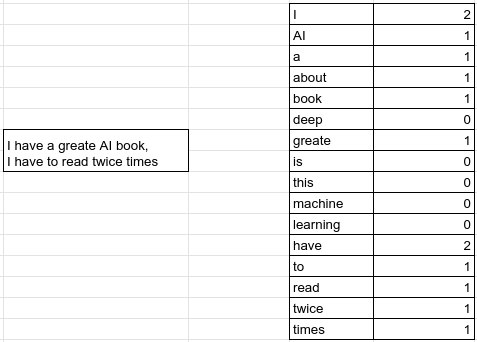

In above picture, the text on the left is encoded into the word frequency vector on the right. The words “I” and have are repeated twice so have a frequency of 2. Words that do not appear in the sentence but are in the dictionary such as “deep”, “is”, “this”, “machine”, “learning” have a value of 0.

Thus, according to the bag-of-words method, each word will become a dimension represented in the space of the output vector. When the number of words is very large, the encoding result can form a vector of very large length. Usually this will be a sparse vector with most values ​​equal to 0. The large number of dimensions makes it difficult to represent coding vectors in space. If we want to represent it on a graph, we must find a way to reduce the vector dimension to 2 or 3 dimensions

Below is the code illustrating the bag of words method. To build the bag-of-words method, we go through two steps:
- Build a dictionary.

- Encode text into word frequency vector.

In [1]:
from functools import reduce
import numpy as np

# The input is a text containing 3 sentences:
texts = [['i', 'have', 'a', 'cat'],
        ['he', 'has', 'a', 'dog'],
        ['he', 'has', 'a', 'dog', 'and', 'i', 'have', 'a', 'cat']]

#B1: Build a dictionary
dictionary = list(enumerate(set(reduce(lambda x, y: x + y, texts))))

# B2: Encode sentences into frequency vectors
def bag_of_word(sentence):
    # Initialize a vector with length equal to the dictionary.
    vector = np.zeros(len(dictionary))
    # Count the words in a sentence that appear in the dictionary.
    for i, word in dictionary:
        count = 0
        # Count the number of words appearing in a sentence.
        for w in sentence:
            if w == word:
                count += 1
            vector[i] = count
    return vector

for i in texts:
    print(bag_of_word(i))

[0. 1. 0. 1. 1. 0. 0. 1.]
[1. 1. 1. 0. 0. 1. 0. 0.]
[1. 2. 1. 1. 1. 1. 1. 1.]


If we want to use the library to find bag-of-words representations of words, in sklearn we use the package as follows:

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

texts = ['i have a cat', 
        'he has a dog', 
        'he has a dog and i have a cat']

vect = CountVectorizer()
X = vect.fit_transform(texts)
print('words in dictionary: ', vect.get_feature_names_out())
print(X.toarray())

words in dictionary:  ['and' 'cat' 'dog' 'has' 'have' 'he']
[[0 1 0 0 1 0]
 [0 0 1 1 0 1]
 [1 1 1 1 1 1]]


This process can be described by the diagram below:

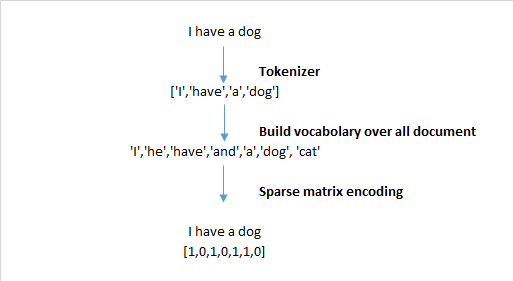

The limitation of bag-of-words representations is that we cannot distinguish between two sentences with the same words because bag-of-words do not distinguish between the front and back order of words in a sentence. Phrases like "you have no dog" and "no, you have dog" are two sentences that have the same performance even though they have opposite meanings.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range = (1, 1))
vect.fit_transform(['you have no dog', 'no, you have dog']).toarray()

array([[1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int64)

That's why the bag-of-n-gram method will be used instead.

#### Bag-of-N-grams Methods

The bag-of-n-grams method is an extension of bag-of-words. An n-grams is a string consisting of $n$ tokens. In case $n = 1$ word we call it unigram, for 2 words it is bigram and for 3 words it is trigram. When performing tokenization with n-grams, clusters of $n - grams$ of words will appear in the dictionary if they appear in the documents. For example, the sentence “I have a dog” will be tokenized into “I have”, “have a”, “a dog”. Thus the number of words in the dictionary will increase significantly. If we have $k$ single words then we can have up to $k^2$ words in the bigram. 

But in reality, not most words can be paired with each other, so the representation vector of a sentence in a bigram is a very sparse vector with a large dimension. This leads to costly computation and storage costs.

In sklearn, to use bigram, in <code>CountVectorizer</code> we change <code>ngram_range = (2, 2)</code>. The first value is the minimum length and the latter value is the maximum allowed length of *ngrams*. Here we declare the smallest and largest lengths to be 2, so we get *ngrams* as *bigrams*.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# bigram
bigram = CountVectorizer(ngram_range = (2, 2))
n1, n2, n3 = bigram.fit_transform(['you have no dog', 'no, you have dog', 'you have a dog']).toarray()

# trigram
trigram = CountVectorizer(ngram_range = (3, 3))
n1, n2, n3 = trigram.fit_transform(['you have no dog', 'no, you have dog', 'you have a dog']).toarray()

After encoding the sentences we can also calculate the distance between vectors in euclidean space:

In [5]:
from scipy.spatial.distance import euclidean
print(euclidean(n1, n2), euclidean(n2, n3), euclidean(n1, n3))

2.0 1.0 1.7320508075688772


#### TF-IDF Method

Suppose we have a corpus consisting of many sub-texts. Words that are rarely found in the corpus but are present in certain topics may play a more important role. For example, for the Family topic, words like “parents”, “grandparents”, “children”, “brothers”, and “sisters” appear more often than other topics.

There are also words that appear a lot in the text, but they appear in almost every topic, every text, such as “the”, “a”, “an”. Such words are called stopwords because they do not have much significance for text classification. When encoding language, we will find ways to remove stopwords by using a dictionary with important stopwords.

The TF-IDF method is a method in which we give greater weight to words that appear in some specific texts through the formula:

$$\text{idf}(t, D) = \log{\frac{\left|D\right|}{\left|d \in D: t \in d\right|}} = \log{\frac{\left|D\right|}{df(d, t) + 1}}$$
$$\text{tfidf}(t, d, D) = \text{tf}(t, d) \times \text{idf}(t, D)$$

Where:
- $\left|D\right|$ is the number of texts in the corpus.
- $\text{df}(d, t) = \left|{d \in D; t \in d}\right|$ is the number of text $d \in D$ that contain the word $t$.
- $\text{tf}(t, d)$ is the frequency of the word $t$ in the text $d$.

Thus $\text{idf}(t, D)$ is the inverse document frequency index. This index is equal to the logarithm of the inverse of the number of documents divided by the number of documents containing a specific word $i$ . A particular word has a large $\text{idf}(t, D)$ indicating that the word appears in only a small number of texts.

$\text{tfidf}(t, d, D)$ is proportional to the frequency of the word appearing in the text and inversely proportional to the frequency of the text. We can explain the meaning of $\text{tfidf}$ for assessing the importance of words as follows: The more important a word is, the more often it will appear in a specific text, such as The text term $d$ is large, i.e. $\text{tf}(t, d)$ is large; At the same time, the word must not be *stopwords*, that is, the number of texts it appears in the entire small text set, meaning $\text{idf}(t, D)$ must be large.

To encode text based on the tfidf method, we use the sklearn package as follows:

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "I like to eat meat sandwiches",
    "She likes to eat bread, and I like to eat sticky rice",
    "the falling stock market makes me worried",
    "Stocks will recover in the near future. my portfolio will grow again",
    "Hanoi weather forecast has rain in the afternoon and evening. I'll bring an umbrella when I go out"
]

# Calculate tfidf for each word. max_df to remove stopwords that appear in more than 90% of sentences
vectorizer = TfidfVectorizer(max_df = 0.9)
# Tokenize and build the vocabulary
X = vectorizer.fit_transform(corpus)
print("words in dictionary: ", vectorizer.get_feature_names_out())
print("X shape: ", X.shape)

words in dictionary:  ['afternoon' 'again' 'an' 'and' 'bread' 'bring' 'eat' 'evening' 'falling'
 'forecast' 'future' 'go' 'grow' 'hanoi' 'has' 'in' 'like' 'likes' 'll'
 'makes' 'market' 'me' 'meat' 'my' 'near' 'out' 'portfolio' 'rain'
 'recover' 'rice' 'sandwiches' 'she' 'sticky' 'stock' 'stocks' 'the' 'to'
 'umbrella' 'weather' 'when' 'will' 'worried']
X shape:  (5, 42)


We can see that the word "I" appears in all sentences and does not carry much meaning of the topic of the sentence, so it can be considered a stopword. By filtering the upper bound of the word's frequency in the text at 90%, we have removed this word from the dictionary.

Pocket methods can find some contests on kaggle such as <a class="reference external" href="https://www.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking">Catch me if you can competition</a>, <a class="reference external" href="https://www.kaggle.com/xiaoml/bag-of-app-id-python-2-27392">bag of app</a>, <a class="reference external" href="http://www.interdigital.com/download/58540a46e3b9659c9f000372">bag of event</a>.

### Word2vec Method

Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located close to another in the space.

word2vec is a family of models used to create embedded representations of words. These models are relatively shallow, consisting only of 2-layer neural networks trained to reconstruct the linguistic context for words. Through the word2vec model, each word in a set of documents is represented through a vector in a high-dimensional space, which can be up to hundreds of dimensions, so that words with the same context will be placed closer together in the word2vec model. space.

For example, below is an example that after performing word encoding through the word2vec model, the words "king", "queen", "man", "woman" have a relationship according to the formula: 

$$\text{king - man + woman = queen}$$

At a specific position in the sentence we will identify a target word and context words. The target word is the word in the selected position and the context words are the words in the surrounding position that help create a semantic context for the target word.

Suppose we have a sentence like this: “I want a blue cup.” If we select a *context window* that includes 3 adjacent words, we will in turn obtain sets of 3 words: “I want one”, “want one”, “a cup”, “colored cup”, “blue cup”. For these sets of three words, the words in the middle will be the target words and the context words will be the words at the beginning and at the end. So we will have pairs of target words and contexts as follows:

```python
[(('I', 'one'), 'want'), (('want', 'piece'), 'one'), (('one', 'cup'), 'piece'), ( ('cup', 'color'), 'cup'), (('cup', 'blue'), 'color')]
```

The word2vec model has two main methods are skip-grams and CBOW as follows:

![CBOW & Skip-gram.png](<attachment:CBOW & Skip-gram.png>)
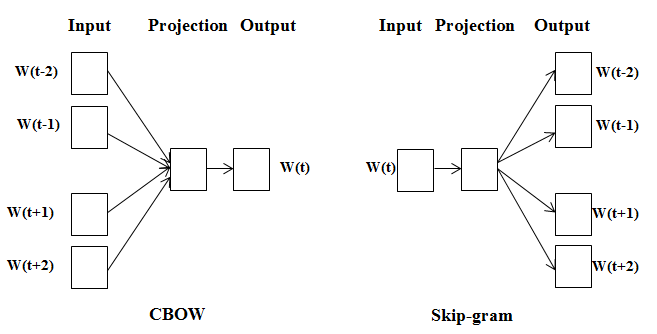

#### CBOW Methods

For the CBOW model, we will build a supervised learning model using context words as input, such as in the picture the words $w_{t - 2}, w_{t - 1}, w_{t + 1}, w_{t + 2}$ to explain the target word in current position as ${w_t}$

The words $w_t$ are encoded as one-hot vectors in a $\mathbb{R}^d$ dimensional space to be used for training. Here, $d$ is the size of the dictionary. Thus, in the CBOW method, we have 5 input one-hot vectors with the number of dimensions equal to the number of words in the dictionary. These vectors are then reduced in dimensionality through a projection onto a lower-dimensional space, for example, 200 dimensions; this step is called the projection in the image. The result is an embedding vector $e_c \in \mathbb{R}^{200}$. Finally, the probability distribution of the target word is predicted through a softmax function applied to the vector $e_c$. The model training process will be based on the cross-entropy form of the softmax function.

$$\mathcal{L}(\mathbf{y}, \hat{\mathbf{y}}) = -\sum_{i=1}^{d} y_i\log(\hat{y}_i)$$

Where $\hat{\mathbf{y}}$ is the probability of predicting the target word corresponding to the word at index position $i$ in the dictionary, calculated according to the softmax formula:

$$\hat{y_i} = \frac{\exp(\mathbf{w}_{:i}^{\intercal}\mathbf{e}_c)}{\sum_{i=1}^{d}\exp(\mathbf{w}_{:i}^{\intercal}\mathbf{e}_c)}$$

$\mathbf{w}_{:i} \in \mathbb{R}^{200}$ is the parameter vector connecting all nodes of $\mathbf{e}_c$ to the $i^{th}$ node position of the last layer.

After the forward and back propagation process, the model coefficients will be updated and we will obtain a more accurate word representation. An input word will be represented through the CBOW method as the vector $\mathbf{e}_c$.

In [7]:
import nltk
from nltk.corpus import gutenberg
from string import punctuation
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Download Gutenberg corpus
nltk.download('gutenberg')
nltk.download('punkt')
norm_bible = gutenberg.sents('bible-kjv.txt') 
norm_bible = [' '.join(doc) for doc in norm_bible]

# Tokenize the text
tokenizer = nltk.tokenize.word_tokenize
tokens = [tokenizer(doc) for doc in norm_bible]

# Build vocabulary
word2id = {'PAD': 0}
for sent in tokens:
    for word in sent:
        if word not in word2id:
            word2id[word] = len(word2id)

id2word = {v: k for k, v in word2id.items()}
vocab_size = len(word2id)

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vocabulary Size: 13759
Vocabulary Sample: [('PAD', 0), ('[', 1), ('The', 2), ('King', 3), ('James', 4), ('Bible', 5), (']', 6), ('Old', 7), ('Testament', 8), ('of', 9)]


In [8]:
# Encode sentences into indices
wids = [[word2id[w] for w in doc] for doc in tokens]
print('Embedding sentence by index: ', wids[:5])

Embedding sentence by index:  [[1, 2, 3, 4, 5, 6], [2, 7, 8, 9, 10, 3, 4, 5], [2, 11, 12, 9, 13, 14, 15, 16], [17, 14, 17, 18, 10, 19, 20, 21, 10, 22, 23, 10, 24, 25], [17, 14, 26, 27, 10, 24, 28, 29, 30, 31, 23, 32, 33, 23, 34, 28, 35, 10, 36, 9, 10, 37, 25]]


In [9]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size * 2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word = word
            start = index - window_size
            end = index + window_size + 1
            context_words = [words[i] for i in range(start, end) if 0 <= i < sentence_length and i != index]
            x = torch.nn.functional.pad(torch.tensor(context_words), (0, context_length - len(context_words)), 'constant', 0)
            y = torch.nn.functional.one_hot(torch.tensor(label_word), num_classes=vocab_size)
            yield x, y

# Test this out for some samples
i = 0
window_size = 2  # context window size
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x:
        print('Context (X):', [id2word[w.item()] for w in x], '-> Target (Y):', id2word[y.argmax().item()])
        if i == 10:
            break
        i += 1

Context (X): ['[', 'The', 'James', 'Bible'] -> Target (Y): King
Context (X): ['The', 'King', 'Bible', ']'] -> Target (Y): James
Context (X): ['The', 'Old', 'of', 'the'] -> Target (Y): Testament
Context (X): ['Old', 'Testament', 'the', 'King'] -> Target (Y): of
Context (X): ['Testament', 'of', 'King', 'James'] -> Target (Y): the
Context (X): ['of', 'the', 'James', 'Bible'] -> Target (Y): King
Context (X): ['The', 'First', 'of', 'Moses'] -> Target (Y): Book
Context (X): ['First', 'Book', 'Moses', ':'] -> Target (Y): of
Context (X): ['Book', 'of', ':', 'Called'] -> Target (Y): Moses
Context (X): ['of', 'Moses', 'Called', 'Genesis'] -> Target (Y): :
Context (X): ['1', ':', 'In', 'the'] -> Target (Y): 1


In [11]:
# Define the CBOW model using PyTorch
class CBOW(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super(CBOW, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.linear1 = nn.Linear(embed_size, vocab_size)
        
    def forward(self, x):
        embeds = self.embedding(x)
        avg_embeds = embeds.mean(dim=1)
        out = self.linear1(avg_embeds)
        log_probs = torch.nn.functional.log_softmax(out, dim=1)
        return log_probs

embed_size = 100
model = CBOW(vocab_size, embed_size)
loss_function = nn.NLLLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.01)

# Prepare data for training
class ContextTargetDataset(Dataset):
    def __init__(self, context_target_pairs):
        self.pairs = list(context_target_pairs)

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        return self.pairs[idx]

context_target_pairs = list(generate_context_word_pairs(corpus=wids[:100], window_size=window_size, vocab_size=vocab_size))
dataset = ContextTargetDataset(context_target_pairs)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Train the model
for epoch in range(1, 100):
    total_loss = 0
    for context, target in dataloader:
        model.zero_grad()
        log_probs = model(context)
        loss = loss_function(log_probs, target.argmax(dim=1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    print(f'Epoch {epoch}, Loss: {total_loss}')

# View model summary
print(model)

Epoch 1, Loss: 521.7630507946014
Epoch 2, Loss: 258.8592987060547
Epoch 3, Loss: 175.8490710258484
Epoch 4, Loss: 127.66212940216064
Epoch 5, Loss: 98.59629130363464
Epoch 6, Loss: 79.42006278038025
Epoch 7, Loss: 65.96231380105019
Epoch 8, Loss: 57.537843093276024
Epoch 9, Loss: 51.170799881219864
Epoch 10, Loss: 46.32542020827532
Epoch 11, Loss: 42.1400792747736
Epoch 12, Loss: 39.87142910063267
Epoch 13, Loss: 38.94939765334129
Epoch 14, Loss: 36.24399475753307
Epoch 15, Loss: 35.20298230648041
Epoch 16, Loss: 33.837794318795204
Epoch 17, Loss: 32.28717716410756
Epoch 18, Loss: 31.784702736884356
Epoch 19, Loss: 30.50809258967638
Epoch 20, Loss: 31.09312973730266
Epoch 21, Loss: 29.649346569553018
Epoch 22, Loss: 28.88797376677394
Epoch 23, Loss: 28.642189282923937
Epoch 24, Loss: 28.109546829015017
Epoch 25, Loss: 27.68133505806327
Epoch 26, Loss: 27.250855254009366
Epoch 27, Loss: 27.445099033415318
Epoch 28, Loss: 27.152747373096645
Epoch 29, Loss: 26.192441053688526
Epoch 30, Lo

#### Skip-gram Methods

The skip-gram method is essentially an inverted version of the CBOW method. We will use the target words as input and predict the context words that project to the target word. As shown in the figure, $\mathbf{w}_t$ is the target word used as input, the words $\mathbf{w}_{t-2}, \mathbf{w}_{t- 1}, \mathbf{w}_{t+1}, \mathbf{w}_{t+2}$ are context words that need to be predicted. These words are all encoded into one-hot vectors in the space $\mathbb{R}^{d}$ Then the one-hot vector will be projected into the space to reduce the data dimension to, for example, 200 afternoon. The output is the vector $\mathbf{e}_c$ of size 200, which is also the embedded representation of the word in the skip-gram. Finally we use a sigmoid layer to predict whether the target word $\mathbf{w}_t$ and the background word $\mathbf{w}_j$ ($\mathbf{w}_j$ are randomly selected from the dictionary) have the same context?

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict
import numpy as np

# Function to generate skip-grams
def generate_skipgrams(wids, vocab_size, window_size):
    skip_grams = []
    for idx, word in enumerate(wids):
        for neighbor in range(max(idx - window_size, 0), min(idx + window_size + 1, len(wids))):
            if neighbor != idx:
                skip_grams.append((word, wids[neighbor]))
    return skip_grams

# Example data
wids = [1, 2, 3, 4, 5, 6]  # Example word IDs
vocab_size = 10
window_size = 2

skip_grams = generate_skipgrams(wids[:100], vocab_size, window_size)

In [15]:
# Sample skip-grams
pairs = skip_grams[:10]
for i in range(10):
    print(f"({pairs[i][0]}, {pairs[i][1]})")

(1, 2)
(1, 3)
(2, 1)
(2, 3)
(2, 4)
(3, 1)
(3, 2)
(3, 4)
(3, 5)
(4, 2)


In [16]:
# Skip-gram model in PyTorch
class SkipGramModel(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super(SkipGramModel, self).__init__()
        self.word_embeddings = nn.Embedding(vocab_size, embed_size)
        self.context_embeddings = nn.Embedding(vocab_size, embed_size)
        
    def forward(self, word_input, context_input):
        word_embed = self.word_embeddings(word_input)
        context_embed = self.context_embeddings(context_input)
        score = torch.mul(word_embed, context_embed).sum(1)
        return torch.sigmoid(score)

embed_size = 50
model = SkipGramModel(vocab_size, embed_size)

print(model)

# Training
loss_function = nn.BCELoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

# Prepare data for training
def get_input_output_pairs(skip_grams):
    word_input = torch.tensor([pair[0] for pair in skip_grams], dtype=torch.long)
    context_input = torch.tensor([pair[1] for pair in skip_grams], dtype=torch.long)
    labels = torch.tensor([1] * len(skip_grams), dtype=torch.float32)  # Assuming all pairs are valid
    return word_input, context_input, labels

# Training loop
for epoch in range(1, 15):
    total_loss = 0
    word_input, context_input, labels = get_input_output_pairs(skip_grams[:100])
    
    optimizer.zero_grad()
    outputs = model(word_input, context_input)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()
    
    total_loss += loss.item()
    print(f'Epoch: {epoch}, Loss: {total_loss}')


SkipGramModel(
  (word_embeddings): Embedding(10, 50)
  (context_embeddings): Embedding(10, 50)
)
Epoch: 1, Loss: 4.751020431518555
Epoch: 2, Loss: 4.4072651863098145
Epoch: 3, Loss: 4.169256687164307
Epoch: 4, Loss: 3.9775755405426025
Epoch: 5, Loss: 3.813333749771118
Epoch: 6, Loss: 3.6677236557006836
Epoch: 7, Loss: 3.535808563232422
Epoch: 8, Loss: 3.414497137069702
Epoch: 9, Loss: 3.301711082458496
Epoch: 10, Loss: 3.1959786415100098
Epoch: 11, Loss: 3.09621524810791
Epoch: 12, Loss: 3.001596450805664
Epoch: 13, Loss: 2.9114785194396973
Epoch: 14, Loss: 2.8253469467163086


Training the word2vec model using a neural network is so we can better understand the neural network structure and how the network works. In fact, to train the word2vec model we can go through the gensim package as follows:

In [17]:
from gensim.models import Word2Vec
# Training model with the first 1000 verses in the bible
sentences = [[item.lower() for item in doc.split()] for doc in norm_bible[:1000]]
model = Word2Vec(sentences, min_count = 1, vector_size = 150, window = 10, sg = 1, workers = 8)
model.train(sentences, total_examples = model.corpus_count, epochs = 10)

(209478, 336740)

In [18]:
print('embedding vector shape: ', model.wv['king'].shape)
model.wv['king'][:5]

embedding vector shape:  (150,)


array([-0.02651765,  0.20900695,  0.2421184 ,  0.13713393, -0.16987683],
      dtype=float32)

### Feature Extraction for Image Data

In the past when computational resources were limited and the “neural network renaissance” had not really returned, feature mining for image data was a complex field. People have to design manual filters to extract features such as corners, edges, horizontal, vertical, diagonal lines, etc. Algorithms such as HOG, SHIFT are commonly used methods to extract features. . The disadvantage of these methods is that the feature extractor and classifier are separated, so the model has slow training and prediction speed.

The thawing period of deep learning has caused the CNN network to grow strongly. Modern CNN network architectures are becoming increasingly deeper and achieving high accuracy. These are end-to-end architectures that allow feature extractors to be attached to classifiers in a single pipeline. The filters also do not need to be initialized manually, on the contrary they are randomly generated according to assumed distributions.

Thanks to the available resources of pretrained models, you don't need to figure out the architecture and train the network from scratch. Instead, a state-of-the-art network that has been trained with weights can be downloaded from published sources. Data scientists often make adjustments to adapt these networks to their needs by “decoupling” the final fully connected layers of the network, adding newly designed layers. designed for a specific task, and then train the network on new data. If your task is just to vectorize the image, you can simply remove the last layers and use the output from the previous layers as the feature vector.

However, we will not focus too much on neural network techniques. Instead, hand-created features are still very useful: for example, for the problem in the Rental Listing Inquiries - Kaggle Competition, to predict the popularity of rental listings, we can assume that the A well-lit apartment will attract more attention and create a new feature like “average pixel value”.

Extract text information on images:

- OCR (Optical character recognition) is a type of problem that extracts text information from images. They are highly applicable and often yield a lot of information when processing image data.

For example, if there is text on an image, you can read it to extract some information through the pytesseract image text detection package.

In [ ]:
!pip install tesseract-ocr # Windows

In [ ]:
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline

##### Just a random picture from search
img = 'http://ohscurrent.org/wp-content/uploads/2015/09/domus-01-google.jpg'
img = requests.get(img)

img = Image.open(BytesIO(img.content))

# show image
img_arr = np.array(img)
plt.imshow(img_arr)

### Geographic Data Extraction

In python we have a quite popular package for exploiting geographical information, <code>reverse_geocoder</code>. There are two main types of problems with geographic information:

- geocoding: encodes a geographic coordinate from an address.

- revert geocoding: from the information provided about longitude and latitude, return the address of the location and related information.

Both problems can be solved through Google map or OpenStreetMap API. The following is an example of extracting geographic information from a location through longitude and latitude.

In [20]:
!pip install reverse_geocoder

     ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
      --------------------------------------- 0.0/2.2 MB 262.6 kB/s eta 0:00:09
     - -------------------------------------- 0.1/2.2 MB 573.4 kB/s eta 0:00:04
     --- ------------------------------------ 0.2/2.2 MB 1.1 MB/s eta 0:00:02
     ------- -------------------------------- 0.4/2.2 MB 2.0 MB/s eta 0:00:01
     -------------- ------------------------- 0.8/2.2 MB 3.0 MB/s eta 0:00:01
     ---------------------- ----------------- 1.3/2.2 MB 4.1 MB/s eta 0:00:01
     -------------------------------- ------- 1.8/2.2 MB 5.1 MB/s eta 0:00:01
     ---------------------------------------- 2.2/2.2 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268081 sha256=94e4f02dc3039b8af5a8d

In [22]:
import reverse_geocoder as revgc

# Giving the latitude and longitude
revgc.search((34.016596, -118.226501))

[{'lat': '34.0339',
  'lon': '-118.20535',
  'name': 'Boyle Heights',
  'admin1': 'California',
  'admin2': 'Los Angeles County',
  'cc': 'US'}]

As we can see, from the coordinates we can know that this apartment is located in Los Angeles, a developed place with a high standard of living. So its price is likely to be higher. From the district and district we can determine whether the apartment is located in the center or not, and the amenities around it. The above information is very important in assessing the sellability of the apartment. Although they do not appear in the original dataset, they can be extracted from geographic coordinates.

### Time Data Extraction

In forecasting, the data often has a changing state. Yesterday's status may be different from today's. Such as a person's height, weight or the market price of stocks. Therefore, time is an information that has a great influence on the target variable. From a known timeline, we can decompose information into hours of the day, days of the month, months, quarters, years, etc. There will be many interesting things to discover from this information. For example, the rules of some number series change according to seasons: Monthly temperatures change according to seasons, GDP changes according to quarterly rules, ice cream sales change according to seasons, etc. The time factor remains. helps determine the changing trend of a variable over time and combined with seasonality, it becomes an important index for estimating time series.

One-hot transformation coding is an important method used to encode time-period variables. One-hot coding will transform a variable into vectors with elements of 0 or 1, where 1 represents the occurrence of the feature and 0 represents features that the variable does not have.

For example: We have 1 day of the week that can fall from Monday to Sunday. Thus a one-hot encoding representation of day 2 would be a vector with the first element equal to 1 and the remaining elements equal to 0. This representation is similar to encoding text data into sparse vector.

In python we can use the weekday() function to determine the order of a day of the week. The weekday() property only exists for datetime data. Therefore, we need to convert date variables that are in string format to datetime format through strftime (string format time). The string format time table can be viewed here.

In [23]:
from datetime import datetime
import pandas as pd

dataset = pd.DataFrame({'created': ['2021-08-13 00:00:00', '2021-08-12 00:00:00', '2021-08-11 00:00:00', 
                                    '2021-08-10 00:00:00', '2021-08-09 00:00:00', '2021-08-08 00:00:00', '2021-08-07 00:00:00']})

def parser(x):
    # Để biết được định dạng strftime của một chuỗi kí tự ta phải tra trong bàng string format time
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

dataset['created'] = dataset['created'].map(lambda x: parser(x))
print(dataset['created'].dtypes)

datetime64[ns]


So the created variable has been converted to datetime format. We can create a one-hot encoding based on the weekday() function

In [24]:
dataset['weekday'] = dataset['created'].apply(lambda x: x.date().weekday())
dataset['weekday']

0    4
1    3
2    2
3    1
4    0
5    6
6    5
Name: weekday, dtype: int64

We can create a variable that returns the status of whether a day is a weekend by checking whether weekday() falls in [5, 6], which is a weekend day or not.

In [25]:
dataset['is_weekend'] = dataset['created'].apply(lambda x: 1 if x.date().weekday() in [5, 6] else 0)
dataset['is_weekend']

0    0
1    0
2    0
3    0
4    0
5    1
6    1
Name: is_weekend, dtype: int64

In some problems the data may be time dependent. For example, a credit card repayment schedule will fall on the statement period on a specific day of the month. When working with time series data, we should pay attention to the list of special days of the year such as Lunar New Year holiday, National Day, International Labor Day, etc. Because these days will often have large fluctuations in data. business materials.

### Data from website, blog, log

Large website systems will track user sessions. Tracked information includes device information, event type, customer ID, etc. From the customer ID, they can link to the user database to know information about gender, age, account, and transaction behavior. ,... In some cases a customer can change the access device, so in most cases we cannot map the session with the Customer ID on local data. However, the information stored in Cookies about the user (also known as the user agent) also provides us with many things. For example: Access devices, browsers, operating systems, etc. From mobile devices, we can also estimate the user's income level: If you use IPhone High income people, using Xiaomi phones, are likely to be middle and low income people, etc. To classify information about users, we can use the <code>user_agents</code> package in python.

In [26]:
!pip install user_agents

In [27]:
import user_agents
# Assume there is a user agent as below
ua = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/56.0.2924.76 Chrome/56.0.2924.76 Safari/537.36'
# Parser user agent information
ua = user_agents.parse(ua)
# Exploit user attributes
print('Is a bot? ', ua.is_bot)
print('Is mobile? ', ua.is_mobile)
print('Is PC? ',ua.is_pc)
print('OS Family: ',ua.os.family)
print('OS Version: ',ua.os.version)
print('Browser Family: ',ua.browser.family)
print('Browser Version: ',ua.browser.version)

Is a bot?  False
Is mobile?  False
Is PC?  True
OS Family:  Ubuntu
OS Version:  ()
Browser Family:  Chromium
Browser Version:  (56, 0, 2924)


## Feature Transformation

Data dimensions often have differences in *scale* and *distribution* and that affects the model in the following aspects:

- Training often leads to the phenomenon of *exploding gradient*. Gradient explosion is a common phenomenon that causes the predicted value to be too large (usually the *nan* value).

- Not standardizing the input data can cause the training process to be unstable and may not be able to overcome the *local optimal* to reach the *global optimal*.

- The predictive value of the target variable becomes more sensitive. For variables with large units and large training weights, a small change in the value of the variable will lead to a large change in the predicted value.

### Standardization

Normalization techniques are applied to variables that do not have a normal distribution. The variable is transformed according to expectation and standard deviation as follows:

$$x_{\text{new}} = \frac{x - \mu}{\sigma}$$

Where $\mu$ is the mean of the variable and $\sigma$ is the standard deviation of the variable.

From there, deduce the value of the variable after converting it back:

$$x = x_{\text{new}} \times \sigma + \mu$$

After being standardized, the variables will have the same standardized distribution with mean 0 and variance 1. Thanks to that, the training process will become stable and converge to the optimal solution faster.

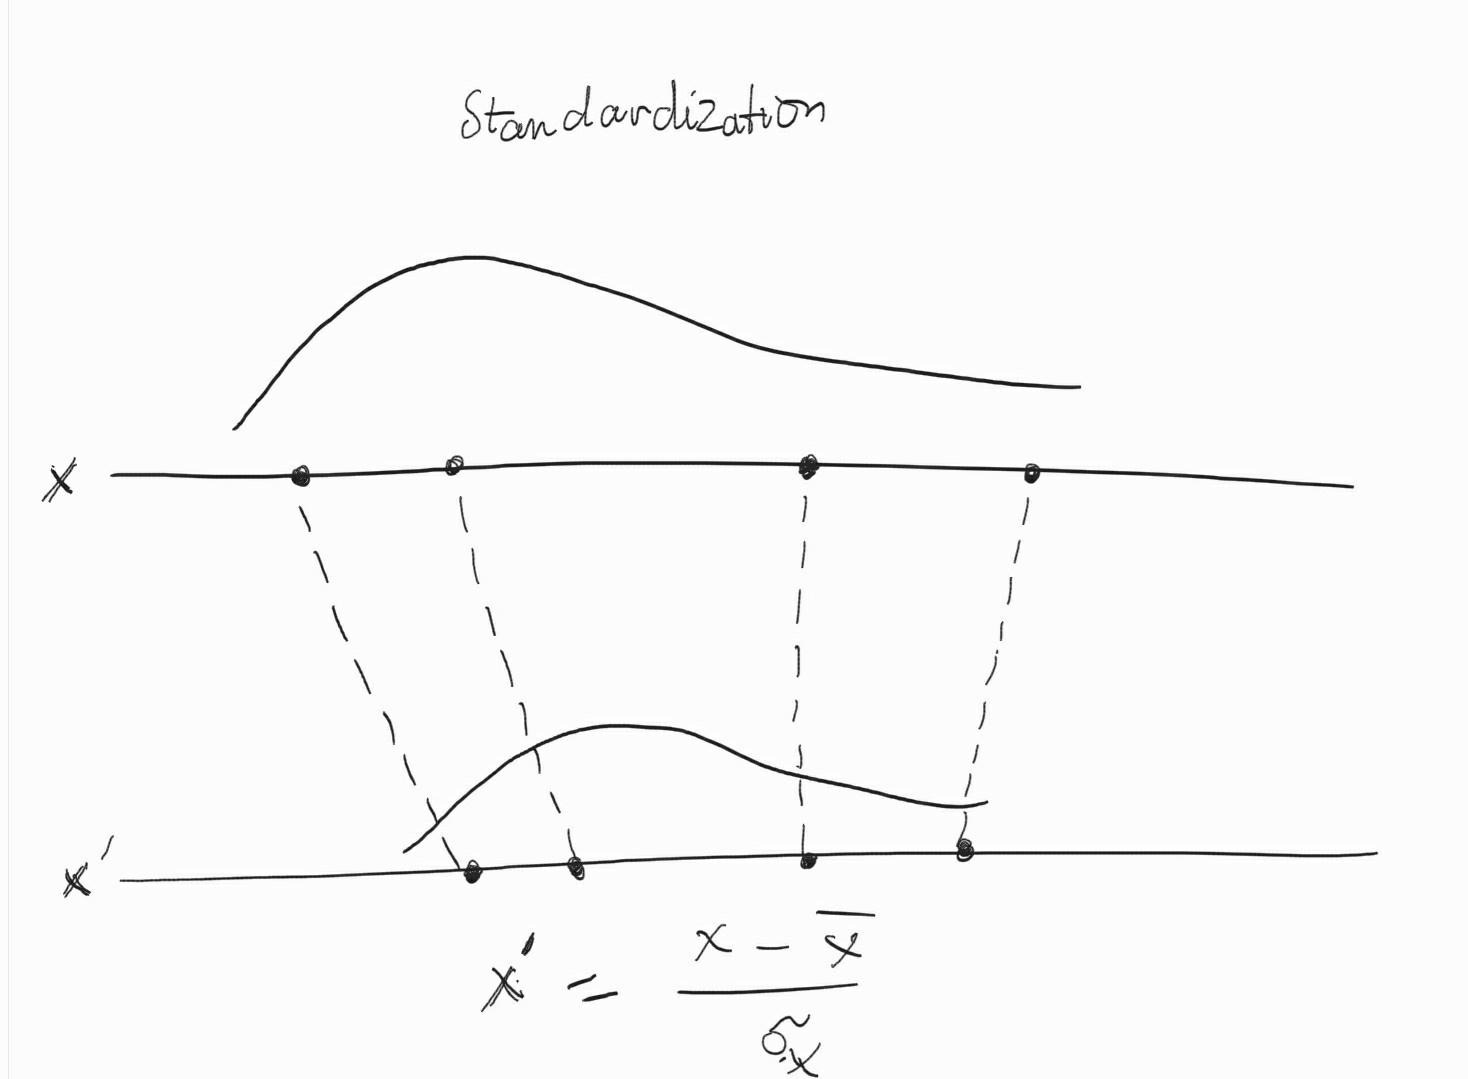

In addition, we can also prove that the normalization method is also a contraction in space in which the distance between any two points is always the same ratio compared to the original space.

Indeed. Suppose we consider two points $x_1$ and $x_2$ in the original space. The coordinates of these two points after MinMax Scaling are respectively $x_1'$ and $x_2'$. They are related to the original value according to the equation:

$$ x_1 = x_1' \times \sigma(x) + \mu$$
$$ x_2 = x_2' \times \sigma(x) + \mu$$

Equal to:

$$\frac{x_1 - x_2}{x_1' - x_2'} = \sigma(x) = \alpha$$

c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

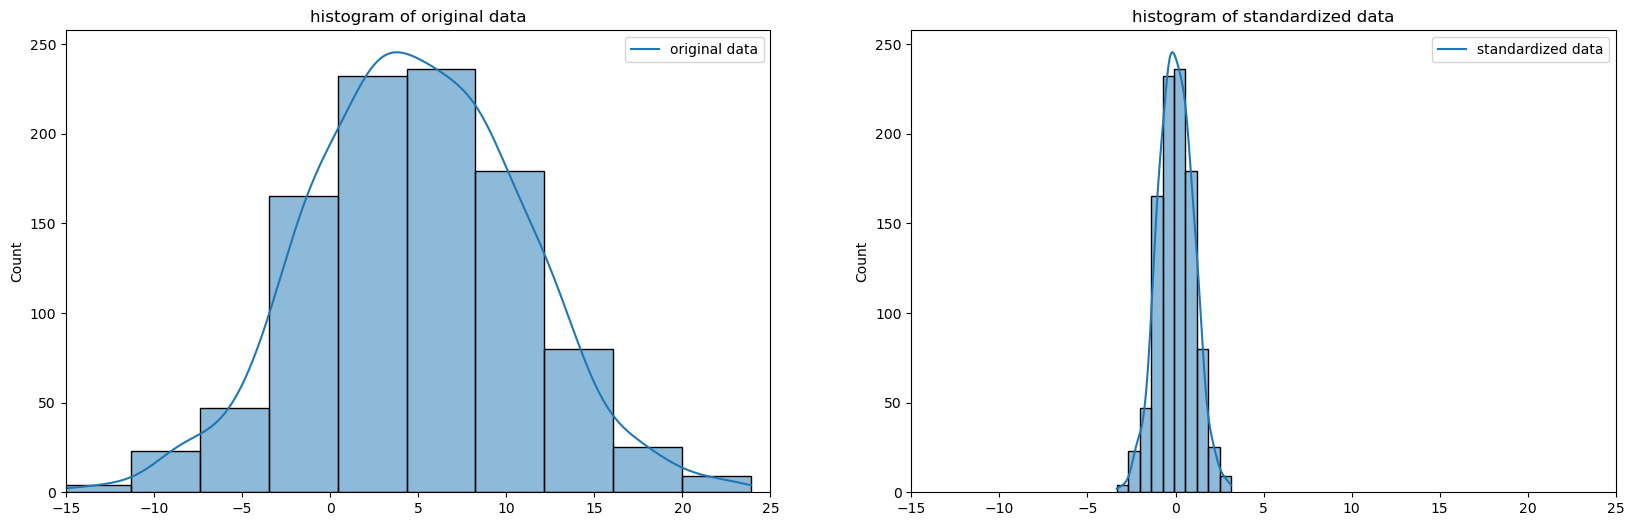

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Initialize a random variable
X = np.random.randn(1000, 1)*6 + 5
# Standardization
X_std = StandardScaler().fit_transform(X.reshape(-1, 1))

def _plot_dist(x, bins=10, xlim=(-1, 1), varname='x'):
  sns.histplot(x, bins = bins, kde = True)
  plt.title('histogram of {}'.format(varname))
  plt.xlim(xlim)
  plt.legend([varname])


# Visualization
fig = plt.figure(figsize=(20, 6))

ax_1 = fig.add_subplot(1, 2, 1)
ax_1 = _plot_dist(X, bins=10, xlim=(-15, 25), varname='original data')


ax_2 = fig.add_subplot(1, 2, 2)
ax_2 = _plot_dist(X_std, bins=10, xlim=(-15, 25), varname='standardized data')

The variable on the left has not been standardized, the variable's range ranges from -15 to 20 and the average is 5. After standardization, we obtain the variable on the right with a normal distribution with a mean of 0 and a range of -2 to 2. Thus, standardizing according to the normal distribution has helped reduce the average magnitude and variance of the variable.

### Scaling Method

For *scaling techniques*, we often apply them to variables that already follow a normal distribution. Through *scaling*, the entire value of the variable will be brought to a limited range of values $[0, 1]$. Then for outliers points appearing on the test dataset, their values ​​may lie outside this domain (i.e there exist values ​​greater than 1 and less than 0). Based on the scaling technique, we will consider resetting the outliers to the endpoints of the bounded domain.

In scaling techniques, we have the following main methods:

#### MinMax Scaling

MinMax Scaling is a technique that scales the variable to a range of $[0, 1]$ according to the formula:

$$x' = \frac{x - \min(x)}{\max(x) - \min(x)}$$

MinMax Scaling is also a spatial contraction in which the ratio of the distance between any two points is preserved compared to their distance in the original space.

Indeed. Suppose we consider two points $x_1$ and $x_2$ in the original space. The coordinates of these two points after MinMax Scaling are respectively $x_1'$ and $x_2'$. They are related to the original value according to the equation:

$$ x_1 = x_1' \times (\max(x) - \min(x)) + \min(x)$$
$$ x_2 = x_2' \times (\max(x) - \min(x)) + \min(x)$$

Equal to:

$$\frac{x_1 - x_2}{x_1' - x_2'} = \max(x) - \min(x) = \alpha$$


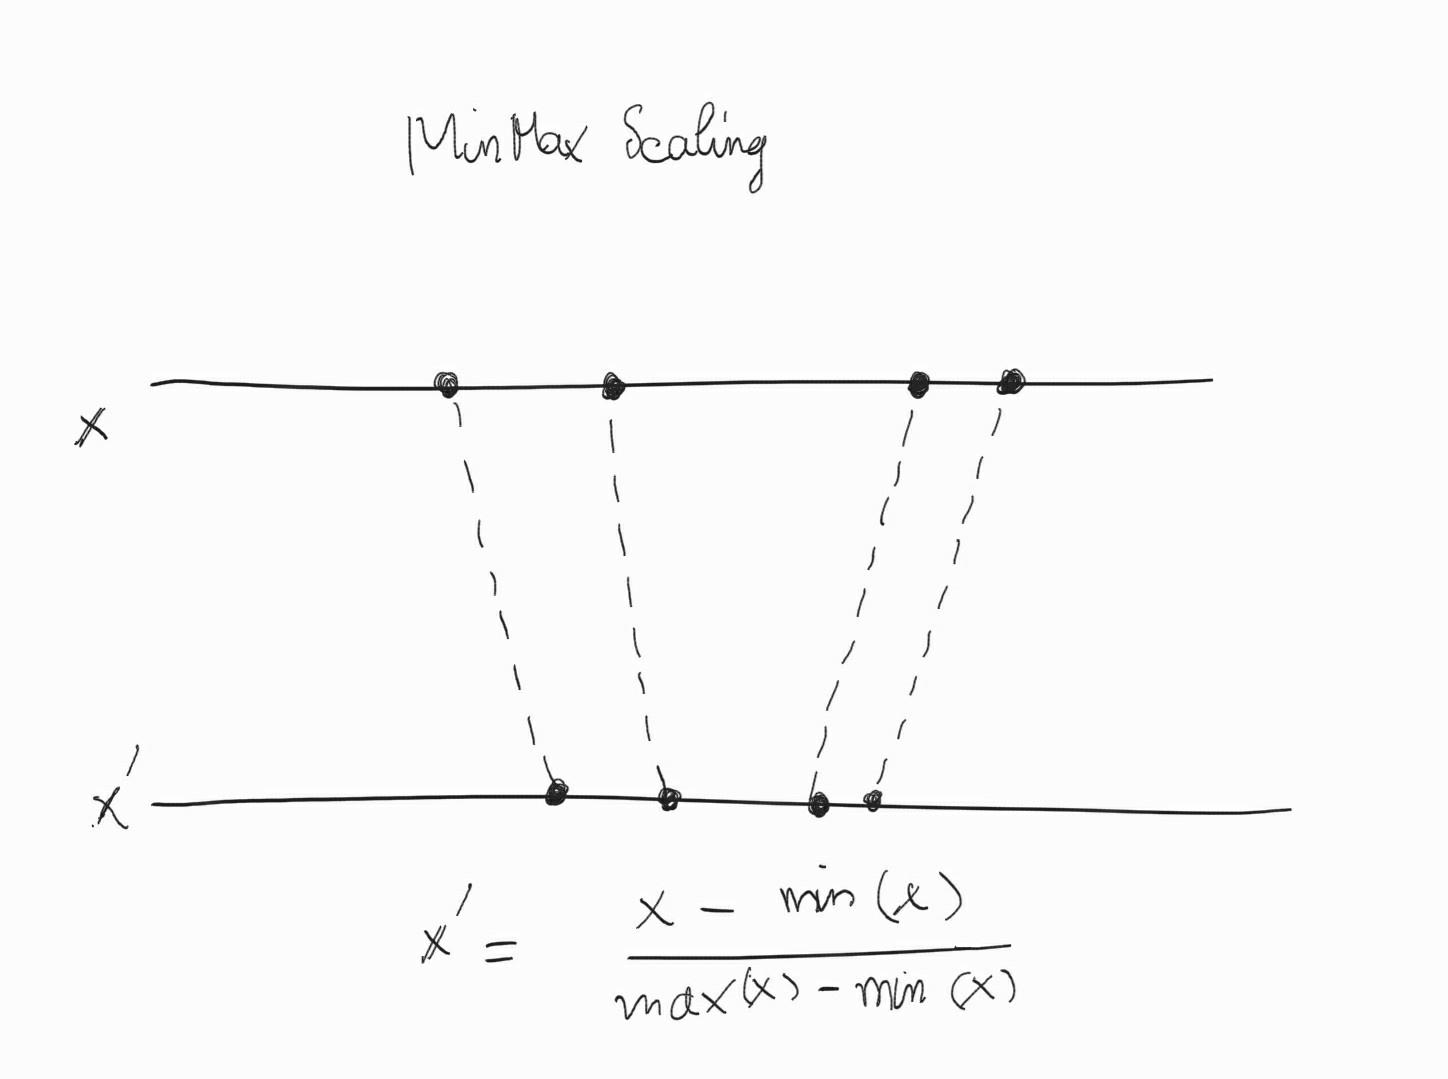

c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

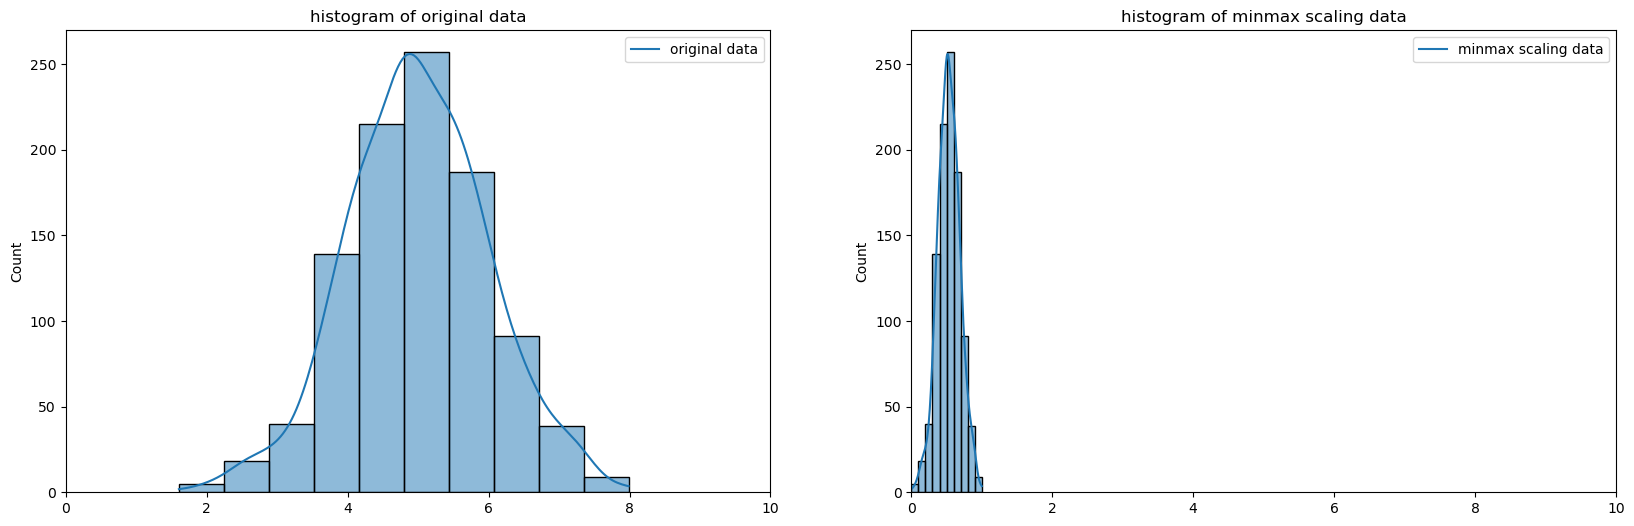

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Khởi tạo một biến X ngẫu nhiên
X = np.random.randn(1000, 1)+5
# minmax scaler của X
X_minmax = MinMaxScaler().fit_transform(X.reshape(-1, 1))

def _plot_dist(x, bins=10, xlim=(-1, 1), varname='x'):
  sns.histplot(x, bins = bins, kde = True)
  plt.title('histogram of {}'.format(varname))
  plt.xlim(xlim)
  plt.legend([varname])


# Visualization
fig = plt.figure(figsize=(20, 6))

ax_1 = fig.add_subplot(1, 2, 1)
ax_1 = _plot_dist(X, bins=10, xlim=(0, 10), varname='original data')

ax_2 = fig.add_subplot(1, 2, 2)
ax_2 = _plot_dist(X_minmax, bins=10, xlim=(0, 10), varname='minmax scaling data')

On the left is the original variable with values ​​ranging from 2 to 8. After standardizing MinMax Scaling, the value of the variable is narrowed to the range $[0, 1]$.

#### Unit Length

According to this method, the value of the variable will be standardized by dividing by the standard norm L2:

$$x' = \frac{x}{\left\|x\right\|_2}$$

Then in Euclidean space it is variable $x'$ will be a vector with length 1 unit. That's why this normalization method is also called unit length normalization. We can also easily see that the values ​​after normalizing by Unit Length will be within the range $[0, 1]$.

Compared to other normalization methods such as ***Standardization*** and **MinMax Scaling**, standardization by **Unit Length** often has the greatest degree of narrowing the variation of the variable. It seems that the variable will be clustered to a very small value range near 0.

c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

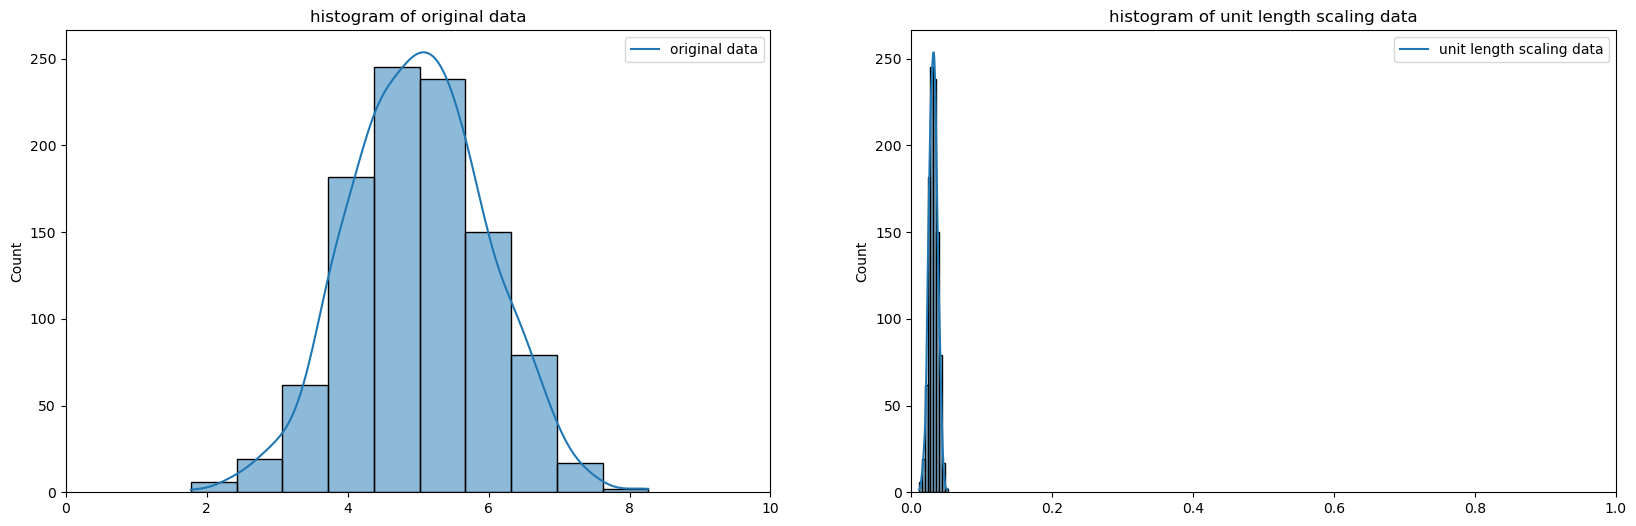

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Khởi tạo một biến X ngẫu nhiên
X = np.random.randn(1000, 1)+5
# Unit Length scaling
X_un = X/np.linalg.norm(X)

def _plot_dist(x, bins=10, xlim=(-1, 1), varname='x'):
  sns.histplot(x, bins = bins, kde = True)
  plt.title('histogram of {}'.format(varname))
  plt.xlim(xlim)
  plt.legend([varname])

# Visualization
fig = plt.figure(figsize=(20, 6))

ax_1 = fig.add_subplot(1, 2, 1)
ax_1 = _plot_dist(X, bins=10, xlim=(0, 10), varname='original data')

ax_2 = fig.add_subplot(1, 2, 2)
ax_2 = _plot_dist(X_un, bins=10, xlim=(0, 1), varname='unit length scaling data')

On the left is the distribution of the original variable and on the right is the distribution of the variable after performing Unit Length scaling. Compared to other distribution methods, Unit Length returns a value with a narrower range and closer to 0.

#### Robust Scaling

In cases where outliers exist in data, normalization methods based on Standardization and MinMax Scaling will often be ineffective. The occurrence of outliers is often at the edge of the variable's distribution and they have a low probability of occurrence. That makes the distribution skewed to one side (high skewness phenomenon) and using conventional normalization methods such as Standardization becomes more difficult because the calculated mean and standard deviation themselves are also distorted. by the appearance of outliers.

One of the approaches to normalizing data when outliers appear is to remove outliers from calculating the mean and standard deviation, then use the calculated values ​​to scale the variable.

This method is **Robust Scaler**. These are performed by calculating median interquartile ranges $Q_2$ (50% percentile) and $Q_1$ (25% percentile) and $Q_3$ (75% percentile) of the variable. The value of a variable will be subtracted from the median $Q_2$ and divided by the interquartile range $IQR = Q_3 - Q_1$:

$$x' = \frac{x - Q_2}{Q_3 - Q_1}$$

Using Robust Scaler can help eliminate outliers and then we can continue to perform other normalization methods later such as Standardization, MinMax Scaling.

```python
sklearn.preprocessing.RobustScaler(
with_centering=True,
with_scaling=True,
quantile_range=(25.0, 75.0),
copy=True,
)
```

Where:
- **with_centering**: Determines whether the value is normalized by subtraction $Q_2$ or not. Default is True.

- **with_scaling**: Determines whether the value is normalized by dividing by $IQR$ or not. Default is True.

We can change the IQR interval length by changing the value of the quantile_range argument. It takes the value of an interval that is a subset of $[0, 100]$. Changing this value will change the definition of the outlier and the scaling magnitude.


c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

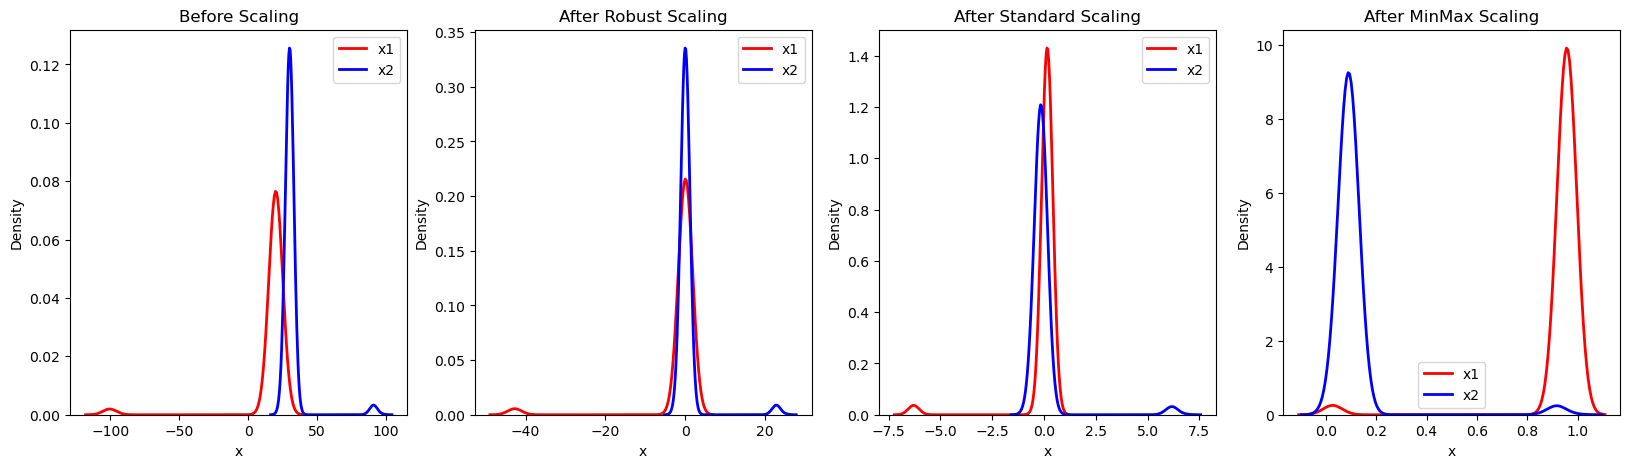

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
  
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(-100, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(90, 2, 25)]),
})
  
# robust scaler  
scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

# standard scaler
scaler = StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

# minmax scaler
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

# visualization
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))

ax1.set_title('Before Scaling')
ax1.set_xlabel('x')
sns.kdeplot(x['x1'], ax = ax1, color ='r', linewidth=2)
sns.kdeplot(x['x2'], ax = ax1, color ='b', linewidth=2)
ax1.legend(['x1', 'x2'])

ax2.set_title('After Robust Scaling')
ax2.set_xlabel('x') 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='r', linewidth=2)
sns.kdeplot(robust_df['x2'], ax = ax2, color ='b', linewidth=2)
ax2.legend(['x1', 'x2'])

ax3.set_title('After Standard Scaling')
ax3.set_xlabel('x')
sns.kdeplot(standard_df['x1'], ax = ax3, color ='r', linewidth=2)
sns.kdeplot(standard_df['x2'], ax = ax3, color ='b' , linewidth=2)
ax3.legend(['x1', 'x2'])

ax4.set_title('After MinMax Scaling')
ax4.set_xlabel('x')
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='r', linewidth=2)
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='b', linewidth=2)
ax4.legend(['x1', 'x2'])

plt.show()

Graph comparing different normalization methods Robust Scaling, Standardization and MinMax Scaling. Variable $x_1$ appears outliers at **low values** ​​while variable $x_2$ appears outliers at **high values**. We can see that the distribution of the variable is significantly skewed to one side for the MinMax Scaling method. The Standardization method, due to the influence of outliers, the distributions will be skewed left or right, not completely symmetrical through point 0. Meanwhile, Robust Scaling, because it has eliminated the influence of outliers, returns distribution results. coordinate symmetrically about 0.

## Feature Selection

To build the model we will need big data. But too big data is not really good either. Systems of large technology corporations can have a number of data fields up to hundreds of thousands. This is a huge number and will cause limitations which are:

- Increased computational costs.

- Too many explanatory variables can lead to overfitting. That means the model works well on the training set but poorly on the test set.

- Among the variables there will be variables that cause noise and reduce model quality.

- Information disorder due to inability to control and understand all variables.

That's why we need methods such as data dimensionality reduction or important variable selection. Data dimensionality reduction methods will be presented in another chapter. In this chapter we will become familiar with some common variable selection techniques.

### Statistical Methods

An important method in statistical methods to reduce the number of variables is variance-based selection. Based on the analysis of non-volatile variables there is no use for classification or forecasting because we seem to know their values ​​for all observations. Therefore, the main idea of ​​this method is through the variance magnitude of all numeric variables to eliminate variables if they are smaller than a certain threshold.

In [5]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import make_classification

# Initialize the dataset
X, y = make_classification(n_samples=500, n_features=50, random_state=123)

print('X shape:', X.shape)
print('y shape:', y.shape)

# Remove features with low variance (thres=0.8)
print('Total features with thres=0.8: {}'.format(VarianceThreshold(0.8).fit_transform(X).shape))

# Remove features with high variance (thres=1.0)
X_kvar = VarianceThreshold(0.9).fit_transform(X)
print('Total features with thres=1.0: {}'.format(X_kvar.shape))

X shape: (500, 50)
y shape: (500,)
Total features with thres=0.8: (500, 49)
Total features with thres=1.0: (500, 46)


In addition to the variance method, we can apply univariate statistical testing. This method will evaluate the linear independence between two random variables based on the chi-squared and Fisher distribution to select the best $k$ variables. To better visualize the two statistical methods mentioned above, next we practice selecting variables and evaluating model effectiveness.

In [7]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Choosing the best 5 features based on Fisher
X_kbest = SelectKBest(f_classif, k = 5).fit_transform(X, y)
print('X shape after applying statistical selection: ',X_kbest.shape)

X shape after applying statistical selection:  (500, 5)


We will evaluate the model's effectiveness by cross-validation before and after variable selection with KFold = 5.

In [8]:
logit = LogisticRegression(solver='lbfgs', random_state=1)

# Cross validation:
# 1. Apply on original data
acc_org = cross_val_score(logit, X, y, scoring = 'accuracy', cv = 5).mean()
# 2. Apply on variance-based data
acc_var = cross_val_score(logit, X_kvar, y, scoring = 'accuracy', cv = 5).mean()
# 3. Apply on statistical-based data
acc_stat = cross_val_score(logit, X_kbest, y, scoring = 'accuracy', cv = 5).mean()

print('Accuracy on original:', acc_org)
print('Accuracy on variance:', acc_var)
print('Accuracy on statistic:', acc_stat)

Accuracy on original: 0.8640000000000001
Accuracy on variance: 0.8560000000000001
Accuracy on statistic: 0.9040000000000001


#### Model-based Methods

This is a method very often applied in data analysis competitions. We will rely on some basic models to evaluate the importance of the variables. There are two classes of models commonly used to evaluate variables: Random Forest and Linear Regression. The advantage of these methods is that the evaluation results are very accurate, but their disadvantage is that they must build a regression model before identifying important variables. This seems to go against the fact that variables must be selected before training the model. To apply this method we do the following:

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Regression against RandomForest
rdFrt = RandomForestClassifier(n_estimators = 20, random_state = 1)
# Regression by LinearSVC
lnSVC = LinearSVC(C=0.01, penalty="l1", dual=False)
# Lasso regression
lassoReg = Lasso(alpha = 1.0)
# Create a pipeline that performs variable selection from the RandomForest model and logit regression
pipe1 = make_pipeline(StandardScaler(), SelectFromModel(estimator = rdFrt), logit)
# Create a pipeline that performs variable selection from the Linear SVC model and logit regression
pipe2 = make_pipeline(StandardScaler(), SelectFromModel(estimator = lnSVC), logit)

# Cross validate against
#1. Logit model
acc_log = cross_val_score(logit, X, y, scoring = 'accuracy', cv = 5).mean()
#2. RandomForest model
acc_rdf = cross_val_score(rdFrt, X, y, scoring = 'accuracy', cv = 5).mean()
#3. Pipe model1
acc_pip1 = cross_val_score(pipe1, X, y, scoring = 'accuracy', cv = 5).mean()
#3. Pipe2 model
acc_pip2 = cross_val_score(pipe2, X, y, scoring = 'accuracy', cv = 5).mean()

print('Accuracy according to logit:', acc_log)
print('Accuracy according to random forest:', acc_rdf)
print('Accuracy according to pipeline 1:', acc_pip1)
print('Accuracy according to pipeline 2:', acc_pip2)

Accuracy according to logit: 0.8640000000000001
Accuracy according to random forest: 0.906
Accuracy according to pipeline 1: 0.906
Accuracy according to pipeline 2: 0.9039999999999999


Thus, selection based on Random Forest and Linear SVC models was effective in improving the accuracy of the model. Besides performing model-based variable selection, we can also select variables by Grid Search, Random Search or Bayesian Optimization.